## Kenyan Avocado Export Investigations

## Navigation:
* [Readme](https://github.com/Fazestar01/Avocado-Exports-from-Kenya/blob/main/README.md)
* [Clean Data](https://github.com/Fazestar01/Avocado-Exports-from-Kenya/blob/main/data/cleaned/cleaned_kenyan_avocados.csv)
* [Raw Data](https://github.com/Fazestar01/Avocado-Exports-from-Kenya/blob/main/data/raw/kenyan-avocados-guide-2023.csv)
* [Dashboard](https://public.tableau.com/app/profile/faiza.abdulqadir/viz/Kenyan_Avocado_Analysis/KenyanAvocadoExportsAnalysis?publish=yes)

#### Importing libraries and loading data

Firstly and the most important thing here, is to import necessary libraries needed for this investigation:

In [11]:
# importing necessary libraries
import pandas as pd 
import numpy as np

Once libraries were imported, the next stage was to move onto loading the CSV file for the investigation to proceed. 

`Side note: The file was originally in the .xlsx format which wasnt very helpful to use as it was near impossible to use on this investigation. The best move was to convert the data into a .CSV file using the Excel software then importing into here.`

### Extraction and Load

In [12]:
# Read CSV file
df = pd.read_csv("../data/raw/kenyan-avocados-guide-2023.csv")
df.head()

,Reporter,TradeFlow,ProductCode,Product Description,Year,Partner,Trade Value 1000USD,Quantity,Quantity Unit
0,Kenya,Export,80440,"Avocados, fresh or dried",2023,World,140939.93,122581000.0,Kg
1,Kenya,Export,80440,"Avocados, fresh or dried",2023,Netherlands,42104.41,37450800.0,Kg
2,Kenya,Export,80440,"Avocados, fresh or dried",2023,United Arab Emirates,19235.41,15931400.0,Kg
3,Kenya,Export,80440,"Avocados, fresh or dried",2023,France,14672.57,12117200.0,Kg
4,Kenya,Export,80440,"Avocados, fresh or dried",2023,Spain,13442.72,11372500.0,Kg


After loading the data, it is an important step to show the .head of the table. This gives a clearer view as it lets me see what the actual data looks like, allows me to check if the columns are named properly and to confirm if the data has loaded properly.

In [13]:
#inspect the dataset
print("✅ Dataset shape:", df.shape)
df.head()

✅ Dataset shape: (62, 9)


,Reporter,TradeFlow,ProductCode,Product Description,Year,Partner,Trade Value 1000USD,Quantity,Quantity Unit
0,Kenya,Export,80440,"Avocados, fresh or dried",2023,World,140939.93,122581000.0,Kg
1,Kenya,Export,80440,"Avocados, fresh or dried",2023,Netherlands,42104.41,37450800.0,Kg
2,Kenya,Export,80440,"Avocados, fresh or dried",2023,United Arab Emirates,19235.41,15931400.0,Kg
3,Kenya,Export,80440,"Avocados, fresh or dried",2023,France,14672.57,12117200.0,Kg
4,Kenya,Export,80440,"Avocados, fresh or dried",2023,Spain,13442.72,11372500.0,Kg


Above shows the number of columns and rows the dataset has and confirms to me that this dataset is enough to be used for this investigation. I also added a '✅' aspect for a clean touch.

### Transformation - Clean and Prepare

Now for this section, I started with cleaning up column names

In [14]:
print(df.columns.tolist())
#display the first few rows of the dataset

['Reporter', 'TradeFlow', 'ProductCode', 'Product Description', 'Year', 'Partner', 'Trade Value 1000USD', 'Quantity', 'Quantity Unit']


Cleaning up names for better formatting

In [15]:
# Clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In order to have a clearer analysis, I cut out and kept only the columns that matters

In [16]:
# Select only the columns we need for analysis
columns_to_keep = ['year', 'partner', 'trade_value_1000usd', 'quantity', 'reporter']
df = df[columns_to_keep]

Now to rename columns for better clarity ✅

In [17]:
df.rename(columns={
    'trade_value_1000usd': 'export_value_usd',
    'quantity': 'export_quantity_tonnes',
    'partner': 'country'
}, inplace=True)

Creating a price per tonne column to show the average price per tonne of avocados in USD. Since export values are in thousands, I multiply by 1000 to get the actual dollar amount.

In [18]:
df['price_per_tonne_usd'] = df['export_value_usd'] * 1000 / df['export_quantity_tonnes']

In [19]:
# Now to rename columns for better clarity ✅
print(df.shape)
df.head()
df.info()

(62, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    62 non-null     int64  
 1   country                 62 non-null     object 
 2   export_value_usd        62 non-null     float64
 3   export_quantity_tonnes  62 non-null     float64
 4   reporter                62 non-null     object 
 5   price_per_tonne_usd     62 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.0+ KB


Now we move onto dropping rows with missing values in key columns

In [20]:
df.dropna(subset=['year', 'country', 'export_value_usd', 'export_quantity_tonnes'], inplace=True)

### Filter

Now that the data has been sorted, I will now filter to just Kenya 🌍

In [21]:
# Filter to only include Kenya
df = df[df['reporter'].str.lower() == 'kenya']


In [22]:
# Remove 'World' entries as they are too vague for country-specific analysis
df = df[df['country'].str.lower() != 'world']
print(f"✅ Removed 'World' entries. Dataset now has {df.shape[0]} rows")

✅ Removed 'World' entries. Dataset now has 62 rows


I also need to convert the year column into integars and `export_quantity_tonnes` into floats

In [23]:
df['year'] = df['year'].astype(int)
df['export_quantity_tonnes'] = df['export_quantity_tonnes'].astype(float)

### Final Data Check

Recalculating the price per tonne to ensure all transformations are applied correctly after filtering and data type conversions.

In [24]:
df['price_per_tonne_usd'] = df['export_value_usd'] * 1000 / df['export_quantity_tonnes']
#Renaming columns for clarity

### Load 

Save cleaned data to new file

In [25]:
import os

# Ensure the directory exists before saving
os.makedirs('../data/cleaned', exist_ok=True)

# Saving the cleaned data to a new CSV file for Tableau analysis
df.to_csv('../data/cleaned/cleaned_kenyan_avocados.csv', index=False)
print("✅ Data successfully saved to cleaned_kenyan_avocados.csv")

✅ Data successfully saved to cleaned_kenyan_avocados.csv


In [26]:
print("✅ Final shape:", df.shape)
print("✅ Columns:", df.columns.tolist())
df.head()


✅ Final shape: (62, 6)
✅ Columns: ['year', 'country', 'export_value_usd', 'export_quantity_tonnes', 'reporter', 'price_per_tonne_usd']


,year,country,export_value_usd,export_quantity_tonnes,reporter,price_per_tonne_usd
0,2023,World,140939.93,122581000.0,Kenya,1.149770
1,2023,Netherlands,42104.41,37450800.0,Kenya,1.124259
2,2023,United Arab Emirates,19235.41,15931400.0,Kenya,1.207390
3,2023,France,14672.57,12117200.0,Kenya,1.210888
4,2023,Spain,13442.72,11372500.0,Kenya,1.182037


The dashboard visualisations for this data can be found [here](https://public.tableau.com/app/profile/faiza.abdulqadir/viz/Kenyan_Avocado_Analysis/KenyanAvocadoExportsAnalysis?publish=yes).

### Now that the data has been extracted, cleaned and loaded into a new dataset, The next stage is now to move onto the hypothesis and visualisations for this investigation. 📊

# Data Visualisation Using : Matplotlib, Seaborn & Plotly

For this section of the investigation, I will be analysing the Kenyan avocado market through various visualisation libraries. 

I have imported the libraies below in one code format which is an easier way to have all the libraries together as aposed to doing it all separately.

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

After adding the libraries, I made it a point to keep the table nice and clean so it is arranged neatly.

In [28]:
# Optional: display charts inside notebook
%matplotlib inline  

# Read the dataset
df = pd.read_csv("../data/raw/kenyan-avocados-guide-2023.csv")

# Clean column names (if not already done)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# View basic info
print(df.shape)
df.head()

(62, 9)


,reporter,tradeflow,productcode,product_description,year,partner,trade_value_1000usd,quantity,quantity_unit
0,Kenya,Export,80440,"Avocados, fresh or dried",2023,World,140939.93,122581000.0,Kg
1,Kenya,Export,80440,"Avocados, fresh or dried",2023,Netherlands,42104.41,37450800.0,Kg
2,Kenya,Export,80440,"Avocados, fresh or dried",2023,United Arab Emirates,19235.41,15931400.0,Kg
3,Kenya,Export,80440,"Avocados, fresh or dried",2023,France,14672.57,12117200.0,Kg
4,Kenya,Export,80440,"Avocados, fresh or dried",2023,Spain,13442.72,11372500.0,Kg


## Chart 1 - Seaborn:

### Bar Chart – Top Export Destinations

**The Goal** : Is to show how avocados export quantity changed over time.

**Bar Chart**  : Identify the top 10 countries importing Kenyan avocados by trade value in 2023.

C:\Users\faiza\AppData\Local\Temp\ipykernel_11880\3855706150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


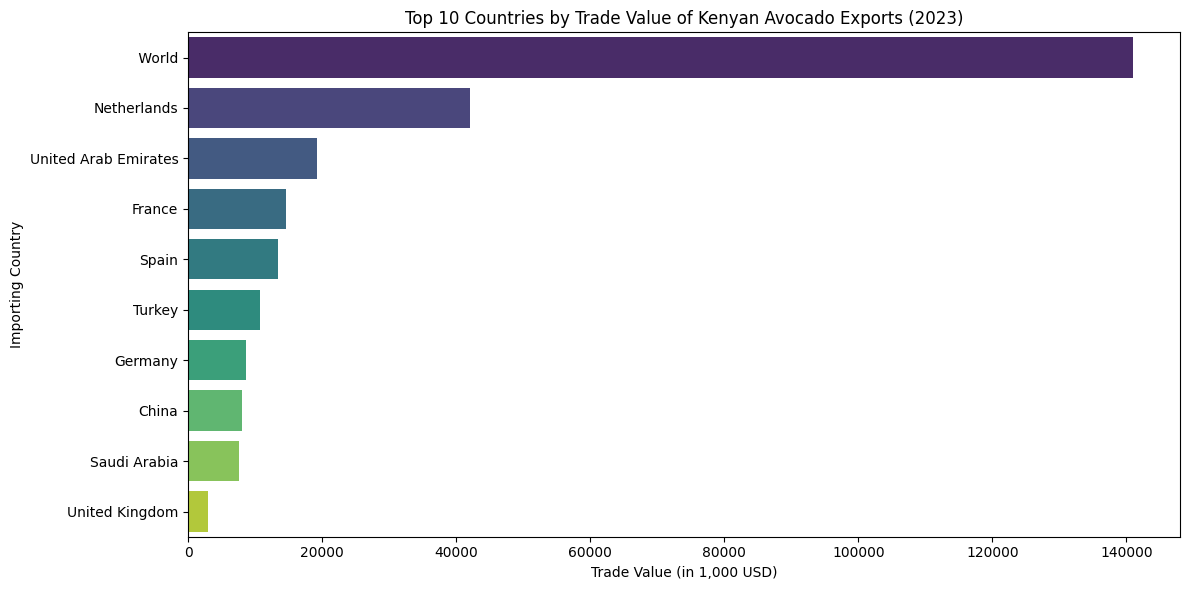

In [29]:
# Sort and select top 10
top_countries = df.groupby('partner')['trade_value_1000usd'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Trade Value of Kenyan Avocado Exports (2023)")
plt.xlabel("Trade Value (in 1,000 USD)")
plt.ylabel("Importing Country")
plt.tight_layout()
plt.show()

The first bar grapth above shows how much avocados in Kenya are exported to different countries in 2023.

 As you will see all the upcoming visuals on this notebook shows 'World' as a category, this is a good point to raise on the upcoming investigations as it is worth noting if this category is necessary.

## Chart 2 - Ploty:

### Scatter Plot – Quantity vs Trade Value

**The Goal** : Explore the realtionships between quantity exported a the trade value to see if more quantity always results in more money.

**Scatter Plot**  : Relationship Between Quantity and Trade Value of Avocado Exports.

In [30]:
fig = px.scatter(df, 
                 x='quantity', 
                 y='trade_value_1000usd', 
                 color='partner',
                 title="Relationship Between Quantity and Trade Value of Avocado Exports",
                 labels={
                     'quantity': 'Quantity (Tonnes)',
                     'trade_value_1000usd': 'Trade Value (1,000 USD)'
                 })

fig.show()

This scatter plot shows whether higher export quanttites always lead to higher trade values (in USD)
This is a great opening point to see whether there's a clear relationship between volume and price/value and to start seeing whether any countries are outliers.

## Chart 3 - Matplotlib & Seaborn:

### Combined Box + Strip Plot – Quantity Distribution by Country

**The Goal** : To visualise the spread and variation in avocado export quantities among Kenya’s top 10 export partner countries, and clearly highlight any outliers in the data.

**Box and Strip Plot**  : Distribution of Export Quantities by Top 10 Countries (2023).

C:\Users\faiza\AppData\Local\Temp\ipykernel_11880\1816671304.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




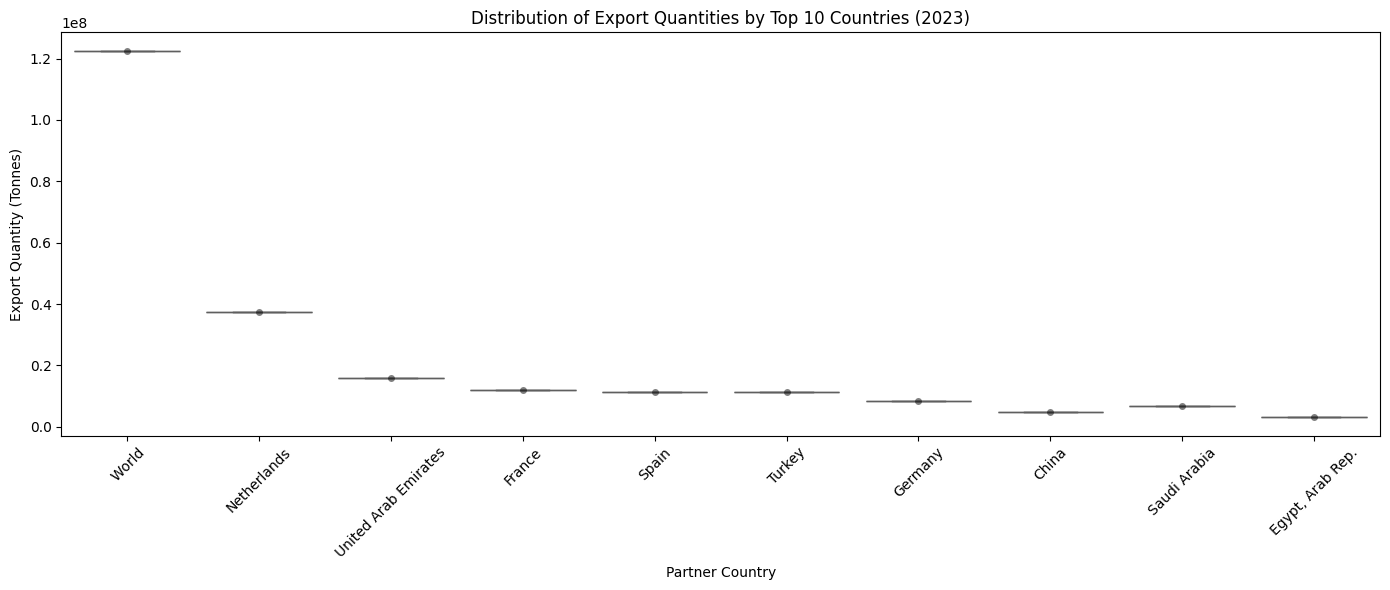

In [31]:
# Step 1: Get top 10 countries by total export quantity
top_10_countries = (
    df.groupby('partner')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Step 2: Filter dataset
top_10_df = df[df['partner'].isin(top_10_countries)]

# Step 3: Create a combined plot
plt.figure(figsize=(14, 6))

# Box plot
sns.boxplot(
    data=top_10_df,
    x='partner',
    y='quantity',
    palette='Set3',
    showfliers=True
)

# Strip plot overlay
sns.stripplot(
    data=top_10_df,
    x='partner',
    y='quantity',
    color='black',
    alpha=0.5,
    jitter=0.2
)

plt.title("Distribution of Export Quantities by Top 10 Countries (2023)")
plt.xlabel("Partner Country")
plt.ylabel("Export Quantity (Tonnes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The final chart on this section was uniquely made as showing just a Box plot or Strip Plot by themselves, would have been redundant and hard to spot a change. 

This combined plot shows how avocado export quantities vary for Kenya's top 10 export countries and highlight outliers.

### To Summarise


I have successfully completed the ETL and EDA process for this first portion of the analysis. The key accomplishments include:

**ETL Pipeline Completed:**
- ✅ **Extracted** raw data from kenyan-avocados-guide-2023.csv
- ✅ **Transformed** data by cleaning column names, filtering for Kenya-specific exports, and removing vague 'World' entries
- ✅ **Loaded** clean dataset into cleaned_kenyan_avocados.csv for Tableau analysis

**Data Quality Improvements:**
- Removed ambiguous 'World' category entries as they were too vague for country-specific export analysis
- Created calculated fields including `price_per_tonne_usd` for deeper insights
- Filtered dataset to focus specifically on Kenya's export destinations
- Standardized column names for consistency

**Key Findings from Visualizations:**
- Identified top 10 export destinations by trade value, providing clear market priorities
- Established relationship patterns between export quantity and trade value through scatter analysis
- Revealed distribution patterns and outliers in export quantities across partner countries

**Next Steps:**
The cleaned dataset is now ready for advanced Tableau dashboard creation and deeper statistical analysis. The foundation has been set to explore Kenya's avocado export market dynamics, pricing strategies, and key trading relationships.
 
The dashboard visualisations for this data can be found [here](https://public.tableau.com/app/profile/faiza.abdulqadir/viz/Kenyan_Avocado_Analysis/KenyanAvocadoExportsAnalysis?publish=yes).
